<a href="https://colab.research.google.com/github/MRazin172/Reinforcement-Learning/blob/main/2348534_RL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
class GridWorld:
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.start_state = (0, 0)
        self.terminal_states = [(3, 3)]
        self.actions = [0, 1, 2, 3]  # 0: Up, 1: Right, 2: Down, 3: Left
        self.rewards = {((3, 3), 0): 0}  # Reward for reaching the terminal state

    def step(self, state, action):
        x, y = state
        if state in self.terminal_states:
            return state, 0, True

        if action == 0:  # Up
            next_state = (max(x - 1, 0), y)
        elif action == 1:  # Right
            next_state = (x, min(y + 1, self.grid_size - 1))
        elif action == 2:  # Down
            next_state = (min(x + 1, self.grid_size - 1), y)
        elif action == 3:  # Left
            next_state = (x, max(y - 1, 0))
        else:
            next_state = state

        reward = self.rewards.get((state, action), -1)
        done = next_state in self.terminal_states
        return next_state, reward, done

    def reset(self):
        return self.start_state

class MonteCarloRL:
    def __init__(self, actions, gamma=0.9, epsilon=0.1):
        self.actions = actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = defaultdict(lambda: np.zeros(len(actions)))
        self.returns = defaultdict(list)
        self.policy = defaultdict(lambda: np.random.choice(actions))

    def generate_episode(self, env):
        episode = []
        state = env.reset()
        done = False
        while not done:
            action = self.select_action(state)
            next_state, reward, done = env.step(state, action)
            episode.append((state, action, reward))
            state = next_state
        return episode

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        return np.argmax(self.q_values[state])

    def train(self, env, episodes):
        for _ in range(episodes):
            episode = self.generate_episode(env)
            g = 0
            visited = set()
            for state, action, reward in reversed(episode):
                g = reward + self.gamma * g
                if (state, action) not in visited:
                    self.returns[(state, action)].append(g)
                    self.q_values[state][action] = np.mean(self.returns[(state, action)])
                    self.policy[state] = np.argmax(self.q_values[state])
                    visited.add((state, action))

In [9]:
def plot_policy(policy, grid_size):
    grid = np.zeros((grid_size, grid_size))
    for (x, y), action in policy.items():
        grid[x, y] = action
    plt.figure(figsize=(8, 8))
    plt.title("Optimal Policy Heatmap")
    plt.imshow(grid, cmap='viridis', origin='upper')
    plt.colorbar(label="Action (0: Up, 1: Right, 2: Down, 3: Left)")
    plt.xlabel("Grid Columns")
    plt.ylabel("Grid Rows")
    plt.show()

In [10]:
def plot_q_value_convergence(q_values, states, action, episodes):
    values = [q_values[state][action] for state in states]
    plt.figure(figsize=(10, 6))
    plt.title(f"Q-Value Convergence for Action {action}")
    plt.plot(range(len(values)), values, label="Q-value")
    plt.xlabel("Episode")
    plt.ylabel("Q-Value")
    plt.legend()
    plt.show()

In [11]:
def plot_episode_path(episode, grid_size):
    path = np.zeros((grid_size, grid_size))
    for (x, y), _, _ in episode:
        path[x, y] += 1
    plt.figure(figsize=(8, 8))
    plt.title("Agent's Path in Single Episode")
    plt.imshow(path, cmap="hot", origin="upper")
    plt.colorbar(label="Frequency of Visits")
    plt.xlabel("Grid Columns")
    plt.ylabel("Grid Rows")
    plt.show()

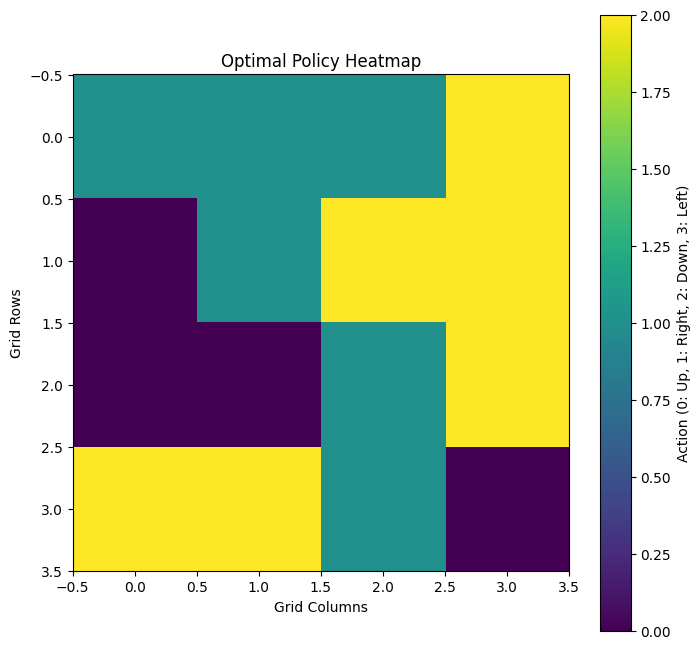

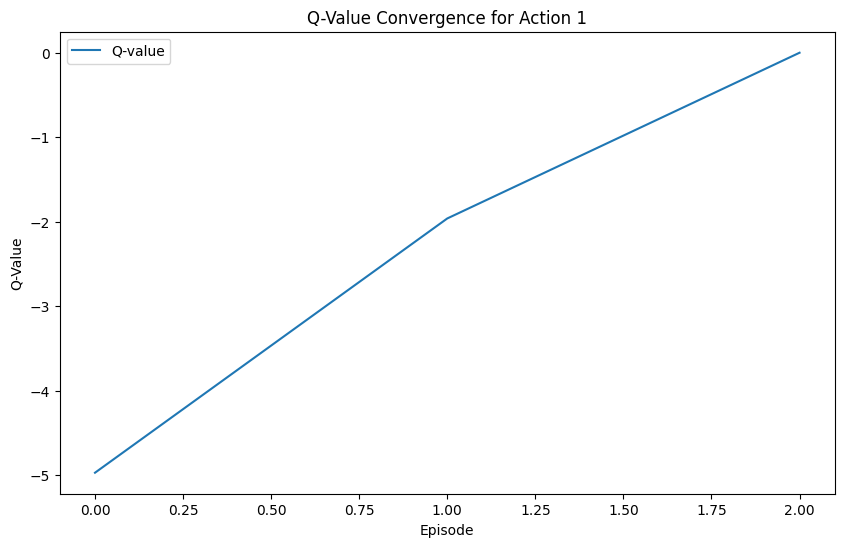

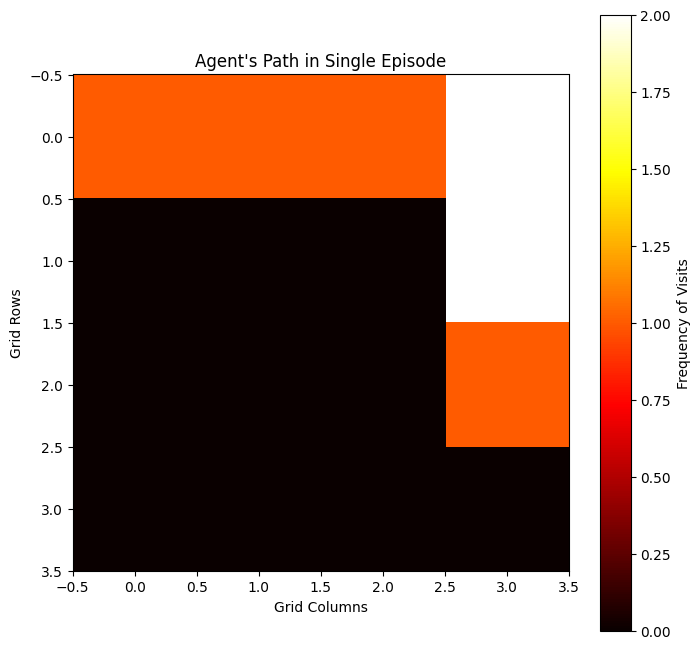

In [12]:
# Main script
actions = [0, 1, 2, 3]
episodes = 5000
env = GridWorld()
mc_agent = MonteCarloRL(actions)

# Train the agent
mc_agent.train(env, episodes)

# Display optimal policy
optimal_policy = {}
for state in mc_agent.q_values:
    optimal_policy[state] = np.argmax(mc_agent.q_values[state])

# Visualize the optimal policy
plot_policy(optimal_policy, env.grid_size)

# Q-Value Convergence Visualization (for specific states and action)
selected_states = [(0, 0), (2, 2), (3, 3)]
plot_q_value_convergence(mc_agent.q_values, selected_states, action=1, episodes=episodes)

# Generate a single episode and plot the path
single_episode = mc_agent.generate_episode(env)
plot_episode_path(single_episode, env.grid_size)
